# Image Classification by using Convolutional Neural Network (CNN)

Author : Prasad Patharvat

# Read Dataset

In [1]:
import pandas as pd
A = pd.read_csv("E:DWD_0406/digitsnpixels.csv")

In [2]:
A.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
A.shape

(42000, 785)

# Visualize 1 image by converting into 28x28 

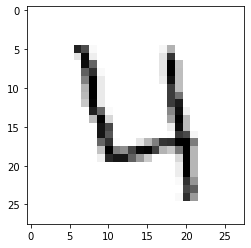

In [4]:
import matplotlib.pyplot as plt 
X = A.drop("label",axis=1).values
plt.imshow(X[3:4].reshape(28,28),cmap=plt.cm.binary)

In [5]:
#X[3:4]

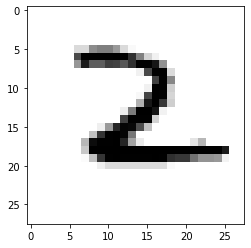

In [6]:
plt.imshow(X[56:57].reshape(28,28),cmap=plt.cm.binary)

In [ ]:
#X[56:57]

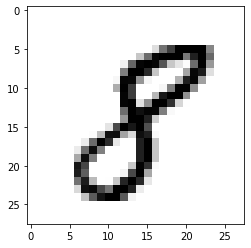

In [7]:
plt.imshow(X[30:31].reshape(28,28),cmap=plt.cm.binary)

In [8]:
#X[30:31]

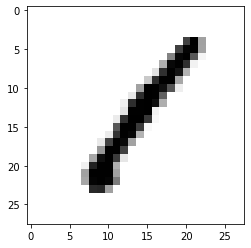

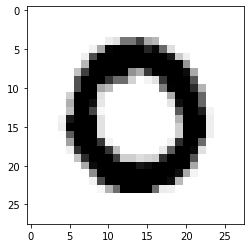

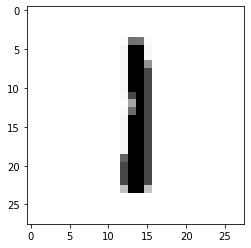

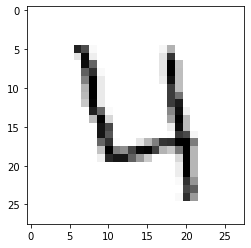

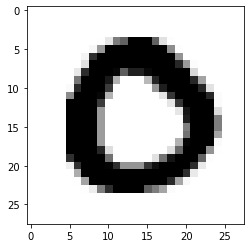

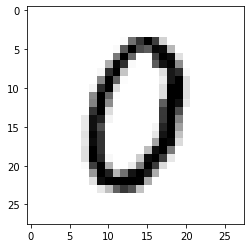

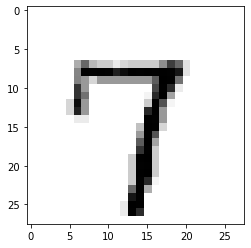

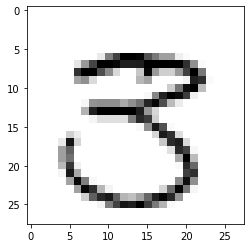

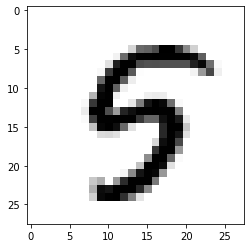

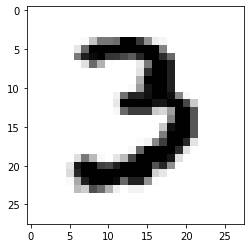

In [9]:
for i in range(0,10,1):
    plt.imshow(X[i].reshape(28,28),cmap=plt.cm.binary)
    plt.show()

# Define X and Y i array format

In [10]:
Y = A.label.values

In [11]:
#Y

In [12]:
X_scaled = X/255      #values of X are scaled(Feature_Scaling).

In [13]:
#X_scaled[2]

In [14]:
Y_cat = pd.get_dummies(Y).values

In [16]:
import tensorflow as tf
tf.keras.utils.to_categorical(Y)

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# Scale X and Y in array form

In [19]:
X_scaled = X/255

In [21]:
X_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
Y_cat

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

# Divide data in Training and Testing set

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_scaled,Y_cat,test_size=0.2,random_state=21)

In [23]:
xtrain.shape

(33600, 784)

In [24]:
xtest.shape

(8400, 784)

In [25]:
xtrain = xtrain.reshape(33600,28,28,1)
xtest = xtest.reshape(8400,28,28,1)

In [26]:
xtrain.shape

(33600, 28, 28, 1)

# Create a Neural Network(NN)

In [27]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,BatchNormalization,Flatten

In [28]:
nn = Sequential()

nn.add(Convolution2D(filters = 16,kernel_size = (3,3),activation="relu",input_shape=(28, 28, 1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))
nn.add(Flatten())

nn.add(Dense(120,activation="relu"))
nn.add(Dense(10,activation="softmax"))

In [29]:
nn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [32]:
nn.fit(xtrain,ytrain,epochs=10,batch_size=64,validation_data=(xtest,ytest))

Epoch 1/10
525/525 [==============================] - 71s 134ms/step - loss: 0.1319 - accuracy: 0.9596 - val_loss: 0.1100 - val_accuracy: 0.9694
Epoch 2/10
525/525 [==============================] - 70s 133ms/step - loss: 0.0611 - accuracy: 0.9796 - val_loss: 0.0695 - val_accuracy: 0.9805
Epoch 3/10
525/525 [==============================] - 78s 149ms/step - loss: 0.0350 - accuracy: 0.9884 - val_loss: 0.0643 - val_accuracy: 0.9827
Epoch 4/10
525/525 [==============================] - 87s 165ms/step - loss: 0.0243 - accuracy: 0.9914 - val_loss: 0.0595 - val_accuracy: 0.9849
Epoch 5/10
525/525 [==============================] - 63s 120ms/step - loss: 0.0210 - accuracy: 0.9920 - val_loss: 0.0671 - val_accuracy: 0.9838
Epoch 6/10
525/525 [==============================] - 68s 129ms/step - loss: 0.0167 - accuracy: 0.9942 - val_loss: 0.0696 - val_accuracy: 0.9843
Epoch 7/10
525/525 [==============================] - 67s 127ms/step - loss: 0.0142 - accuracy: 0.9950 - val_loss: 0.0898 - val_ac

In [34]:
nn.evaluate(xtest,ytest,batch_size=64)

132/132 [==============================] - 6s 48ms/step - loss: 0.0826 - accuracy: 0.9845


[0.08261590451002121, 0.9845238327980042]

In [35]:
from numpy import argmax
pred = nn.predict(xtest)

In [36]:
pred

array([[1.1824800e-15, 1.0000000e+00, 1.0824713e-11, ..., 3.9909800e-08,
        2.6947461e-12, 5.6503132e-14],
       [2.3787396e-20, 1.9703999e-14, 1.1647847e-19, ..., 3.5404479e-12,
        3.8141989e-21, 5.6266647e-10],
       [6.5417500e-14, 2.2867131e-12, 9.9999988e-01, ..., 2.2611137e-10,
        5.0616795e-11, 4.1882583e-08],
       ...,
       [1.0000000e+00, 4.2640943e-11, 4.3456089e-11, ..., 3.5620603e-13,
        1.8078139e-13, 6.0066356e-13],
       [2.2924722e-17, 1.0000000e+00, 2.4005188e-11, ..., 3.8481796e-09,
        4.7864815e-12, 3.8862066e-11],
       [4.1374140e-10, 9.6971853e-10, 9.9999964e-01, ..., 3.5277395e-07,
        1.3824841e-09, 5.7017463e-10]], dtype=float32)

In [37]:
pd.DataFrame(pred)

,0,1,2,3,4,5,6,7,8,9
0,1.182480e-15,1.000000e+00,1.082471e-11,6.004288e-13,1.753803e-15,9.574815e-15,8.393620e-15,3.990980e-08,2.694746e-12,5.650313e-14
1,2.378740e-20,1.970400e-14,1.164785e-19,3.396221e-16,1.000000e+00,7.683955e-16,5.647554e-18,3.540448e-12,3.814199e-21,5.626665e-10
2,6.541750e-14,2.286713e-12,9.999999e-01,2.037552e-09,1.316406e-07,1.933181e-17,4.465674e-18,2.261114e-10,5.061680e-11,4.188258e-08
3,2.388025e-18,1.142759e-15,1.015132e-15,1.000000e+00,1.802158e-24,1.244500e-09,3.490946e-20,1.073482e-15,3.232440e-14,2.195127e-14
4,8.876301e-12,4.544260e-13,2.533294e-07,3.859541e-07,8.059548e-20,1.206517e-12,3.746986e-13,4.862420e-12,9.999994e-01,3.337017e-12
...,...,...,...,...,...,...,...,...,...,...
8395,9.912782e-17,9.382856e-07,9.999990e-01,5.930347e-13,1.287743e-21,2.931996e-21,2.013909e-20,2.871282e-08,8.315023e-15,8.163680e-17
8396,1.747374e-13,5.391347e-15,1.932761e-10,1.452085e-12,3.486958e-14,4.581406e-17,2.044111e-21,1.000000e+00,1.652479e-17,1.353515e-10
8397,1.000000e+00,4.264094e-11,4.345609e-11,5.938221e-16,1.737301e-13,1.348440e-18,4.744670e-12,3.562060e-13,1.807814e-13,6.006636e-13
8398,2.292472e-17,1.000000e+00,2.400519e-11,7.025239e-10,3.682362e-08,6.699012e-12,5.875068e-15,3.848180e-09,4.786482e-12,3.886207e-11


In [38]:
xtest.shape

(8400, 28, 28, 1)

In [39]:
pred = argmax(pred,axis=1)

In [40]:
pred

array([1, 4, 2, ..., 0, 1, 2], dtype=int64)

In [41]:
XT =xtest*255

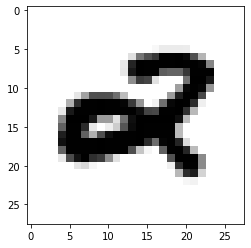

In [43]:
plt.imshow(XT[2].reshape(28,28),cmap=plt.cm.binary)

In [44]:
pred[0]

1

---------------------------
Pridicted_value 1
---------------------------


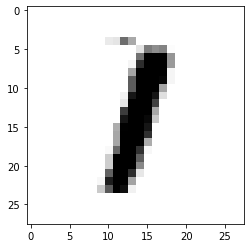

---------------------------
Pridicted_value 4
---------------------------


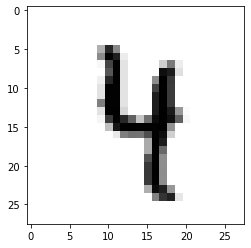

---------------------------
Pridicted_value 2
---------------------------


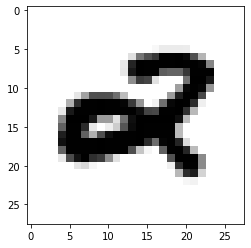

---------------------------
Pridicted_value 3
---------------------------


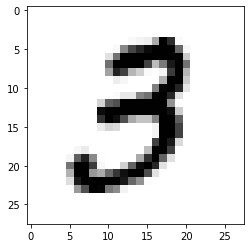

---------------------------
Pridicted_value 8
---------------------------


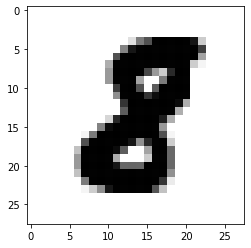

---------------------------
Pridicted_value 9
---------------------------


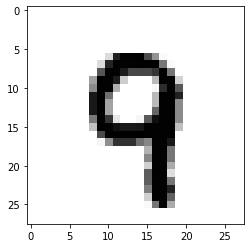

---------------------------
Pridicted_value 6
---------------------------


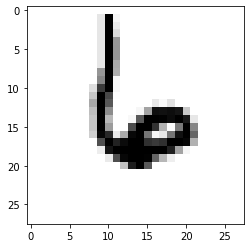

---------------------------
Pridicted_value 6
---------------------------


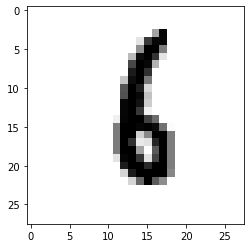

---------------------------
Pridicted_value 4
---------------------------


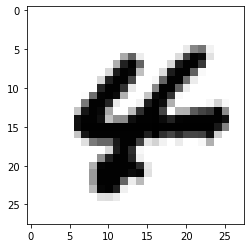

---------------------------
Pridicted_value 9
---------------------------


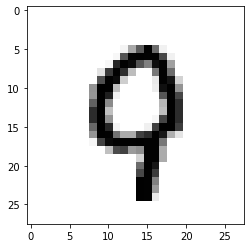

---------------------------
Pridicted_value 3
---------------------------


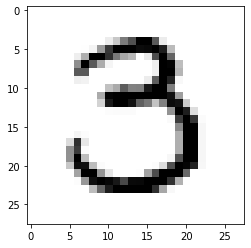

---------------------------
Pridicted_value 5
---------------------------


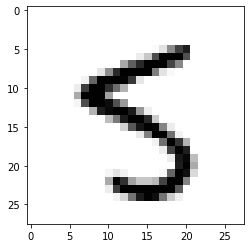

---------------------------
Pridicted_value 2
---------------------------


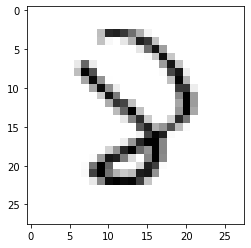

---------------------------
Pridicted_value 9
---------------------------


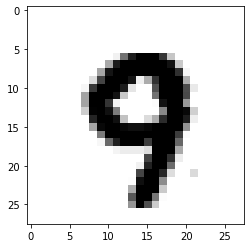

---------------------------
Pridicted_value 7
---------------------------


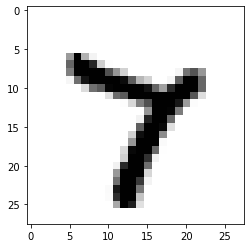

---------------------------
Pridicted_value 3
---------------------------


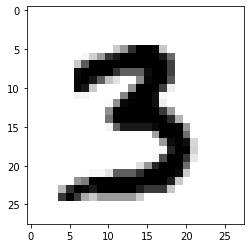

---------------------------
Pridicted_value 3
---------------------------


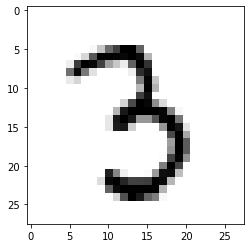

---------------------------
Pridicted_value 3
---------------------------


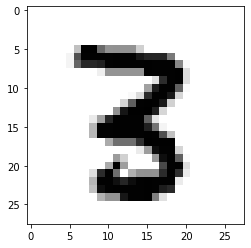

---------------------------
Pridicted_value 5
---------------------------


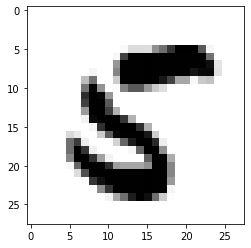

---------------------------
Pridicted_value 9
---------------------------


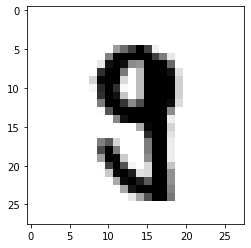

---------------------------
Pridicted_value 8
---------------------------


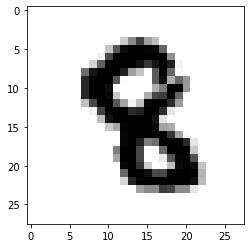

---------------------------
Pridicted_value 0
---------------------------


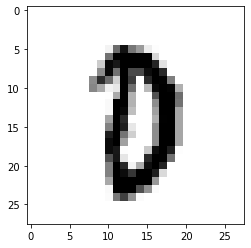

---------------------------
Pridicted_value 8
---------------------------


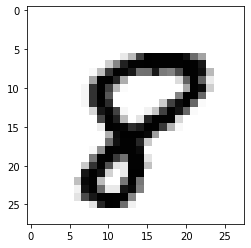

---------------------------
Pridicted_value 0
---------------------------


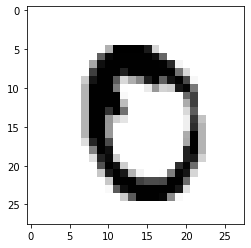

---------------------------
Pridicted_value 4
---------------------------


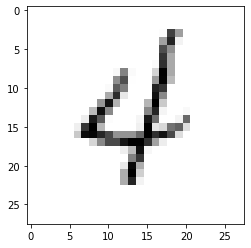

---------------------------
Pridicted_value 0
---------------------------


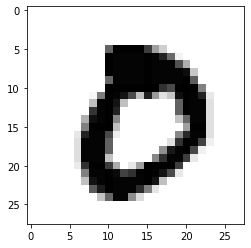

---------------------------
Pridicted_value 3
---------------------------


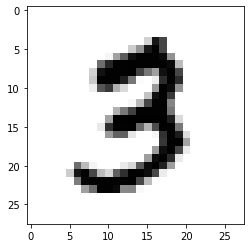

---------------------------
Pridicted_value 4
---------------------------


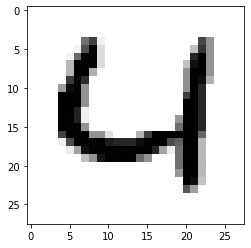

---------------------------
Pridicted_value 9
---------------------------


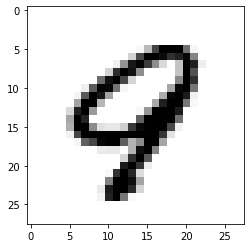

---------------------------
Pridicted_value 9
---------------------------


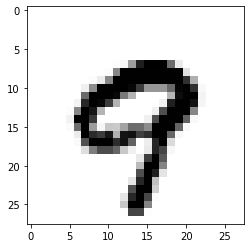

---------------------------
Pridicted_value 5
---------------------------


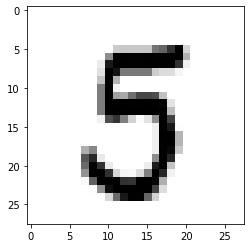

---------------------------
Pridicted_value 1
---------------------------


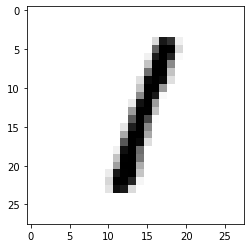

---------------------------
Pridicted_value 8
---------------------------


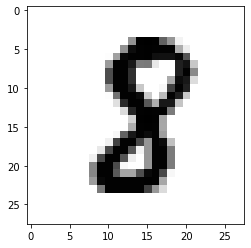

---------------------------
Pridicted_value 0
---------------------------


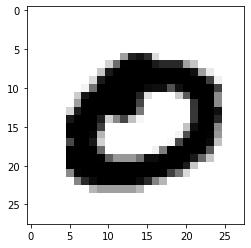

---------------------------
Pridicted_value 6
---------------------------


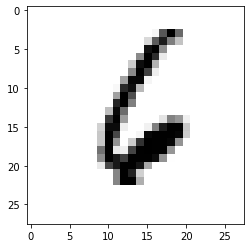

---------------------------
Pridicted_value 4
---------------------------


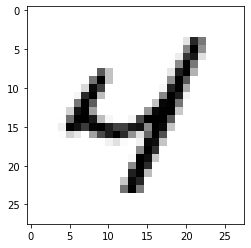

---------------------------
Pridicted_value 0
---------------------------


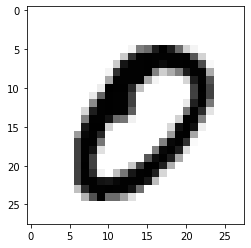

---------------------------
Pridicted_value 5
---------------------------


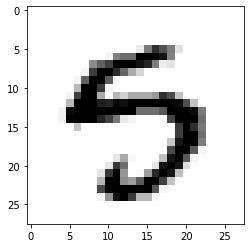

---------------------------
Pridicted_value 6
---------------------------


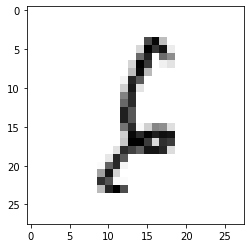

---------------------------
Pridicted_value 8
---------------------------


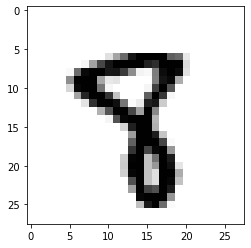

---------------------------
Pridicted_value 0
---------------------------


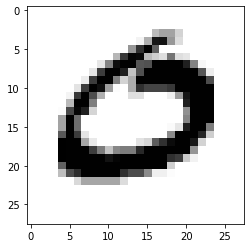

---------------------------
Pridicted_value 4
---------------------------


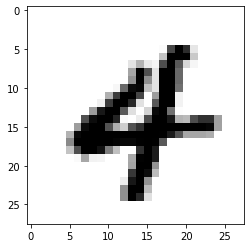

---------------------------
Pridicted_value 0
---------------------------


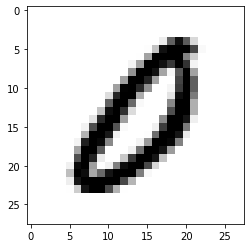

---------------------------
Pridicted_value 8
---------------------------


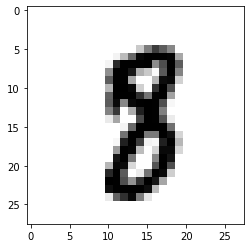

---------------------------
Pridicted_value 7
---------------------------


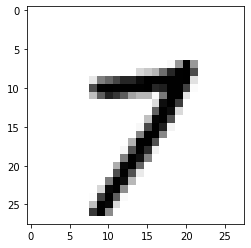

---------------------------
Pridicted_value 3
---------------------------


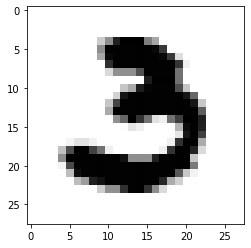

---------------------------
Pridicted_value 8
---------------------------


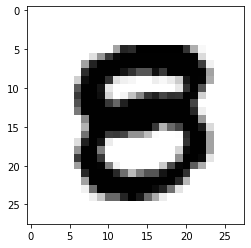

---------------------------
Pridicted_value 8
---------------------------


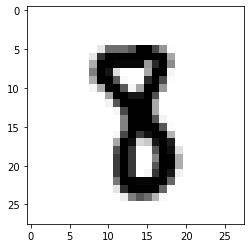

---------------------------
Pridicted_value 3
---------------------------


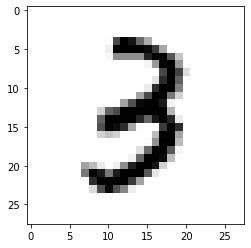

---------------------------
Pridicted_value 6
---------------------------


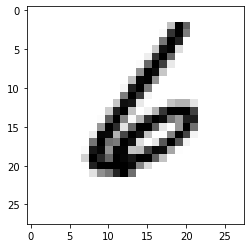

---------------------------
Pridicted_value 3
---------------------------


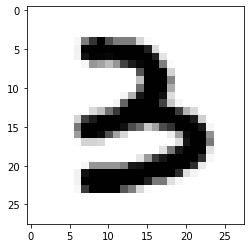

---------------------------
Pridicted_value 2
---------------------------


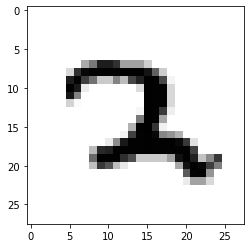

---------------------------
Pridicted_value 2
---------------------------


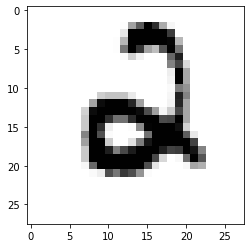

---------------------------
Pridicted_value 1
---------------------------


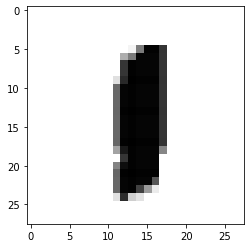

---------------------------
Pridicted_value 7
---------------------------


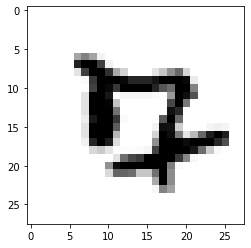

---------------------------
Pridicted_value 1
---------------------------


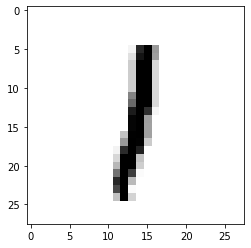

---------------------------
Pridicted_value 9
---------------------------


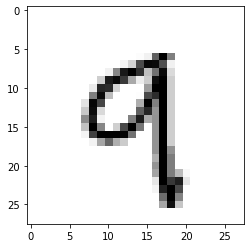

---------------------------
Pridicted_value 9
---------------------------


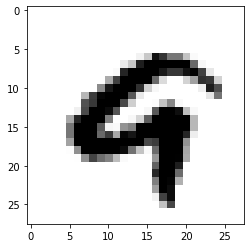

---------------------------
Pridicted_value 0
---------------------------


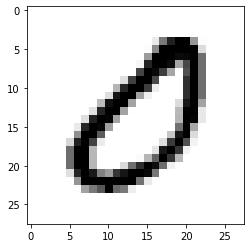

---------------------------
Pridicted_value 7
---------------------------


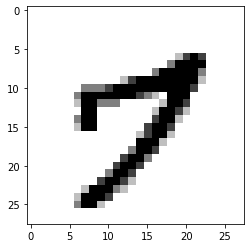

---------------------------
Pridicted_value 6
---------------------------


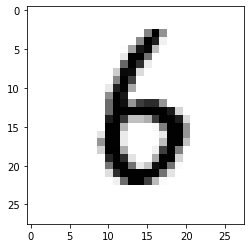

---------------------------
Pridicted_value 4
---------------------------


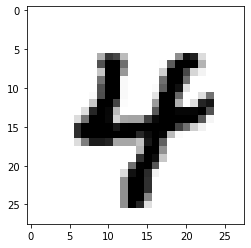

---------------------------
Pridicted_value 1
---------------------------


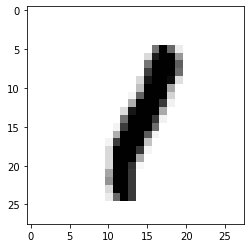

---------------------------
Pridicted_value 4
---------------------------


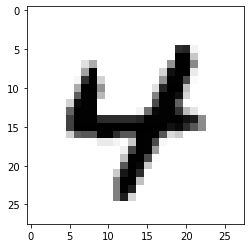

---------------------------
Pridicted_value 2
---------------------------


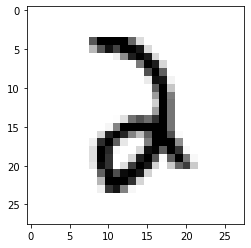

---------------------------
Pridicted_value 5
---------------------------


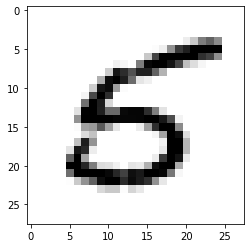

---------------------------
Pridicted_value 4
---------------------------


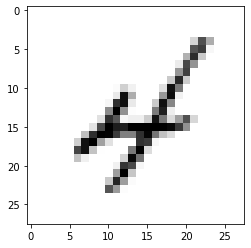

---------------------------
Pridicted_value 0
---------------------------


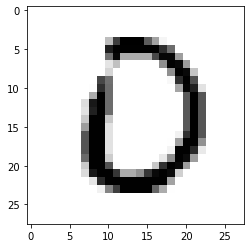

---------------------------
Pridicted_value 9
---------------------------


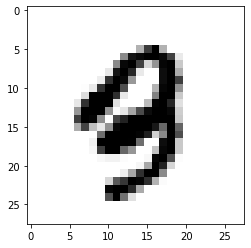

---------------------------
Pridicted_value 8
---------------------------


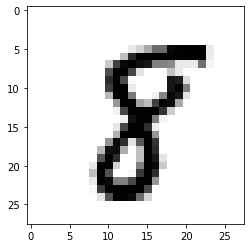

---------------------------
Pridicted_value 2
---------------------------


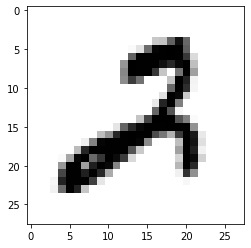

---------------------------
Pridicted_value 7
---------------------------


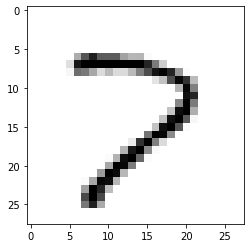

---------------------------
Pridicted_value 0
---------------------------


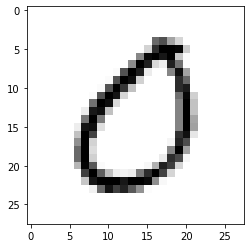

---------------------------
Pridicted_value 5
---------------------------


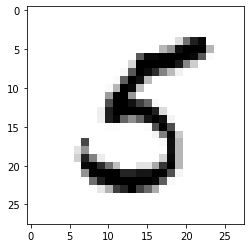

---------------------------
Pridicted_value 1
---------------------------


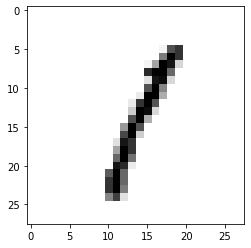

---------------------------
Pridicted_value 7
---------------------------


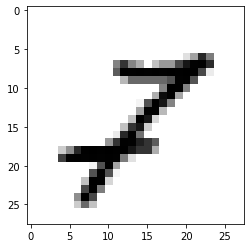

---------------------------
Pridicted_value 6
---------------------------


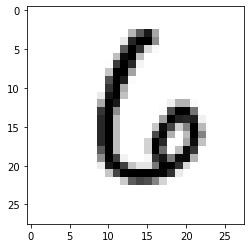

---------------------------
Pridicted_value 8
---------------------------


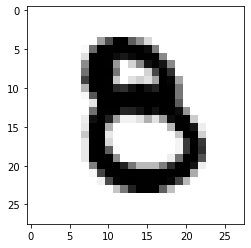

---------------------------
Pridicted_value 6
---------------------------


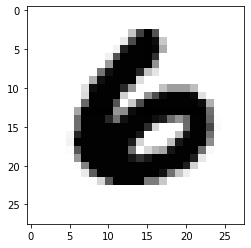

---------------------------
Pridicted_value 8
---------------------------


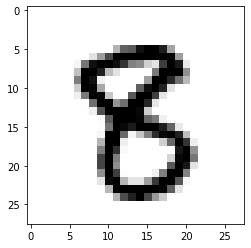

---------------------------
Pridicted_value 7
---------------------------


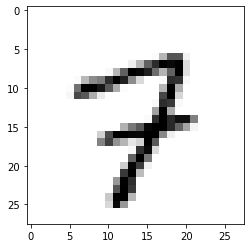

---------------------------
Pridicted_value 4
---------------------------


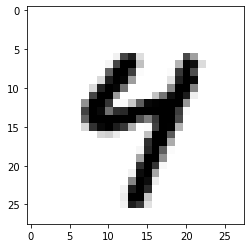

---------------------------
Pridicted_value 1
---------------------------


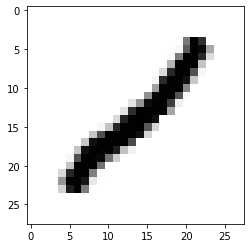

---------------------------
Pridicted_value 0
---------------------------


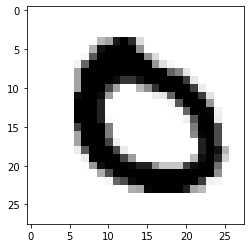

---------------------------
Pridicted_value 4
---------------------------


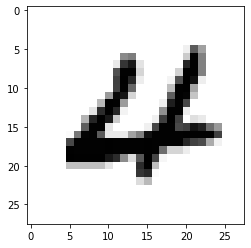

---------------------------
Pridicted_value 8
---------------------------


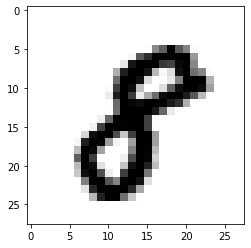

---------------------------
Pridicted_value 4
---------------------------


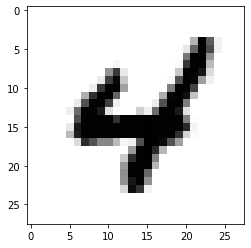

---------------------------
Pridicted_value 5
---------------------------


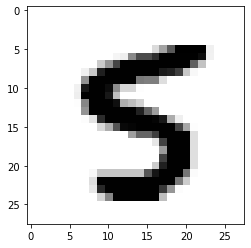

---------------------------
Pridicted_value 5
---------------------------


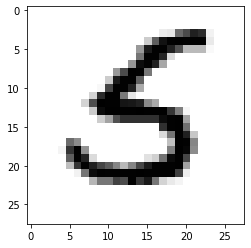

---------------------------
Pridicted_value 4
---------------------------


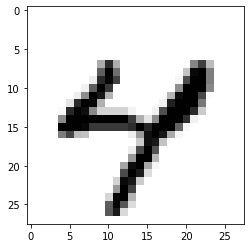

---------------------------
Pridicted_value 6
---------------------------


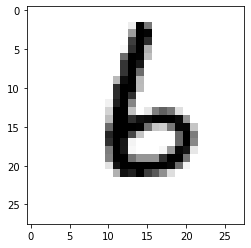

---------------------------
Pridicted_value 5
---------------------------


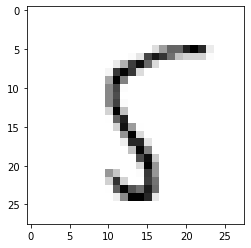

---------------------------
Pridicted_value 7
---------------------------


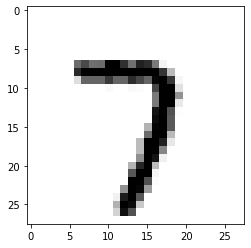

---------------------------
Pridicted_value 3
---------------------------


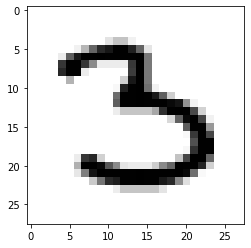

---------------------------
Pridicted_value 6
---------------------------


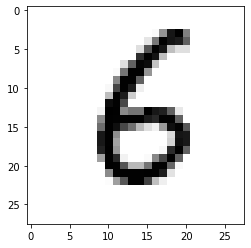

---------------------------
Pridicted_value 6
---------------------------


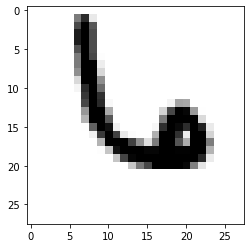

---------------------------
Pridicted_value 6
---------------------------


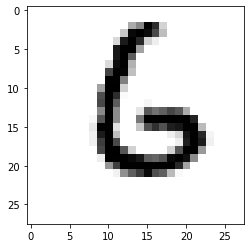

---------------------------
Pridicted_value 0
---------------------------


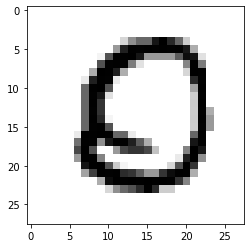

---------------------------
Pridicted_value 0
---------------------------


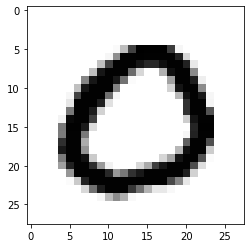

---------------------------
Pridicted_value 8
---------------------------


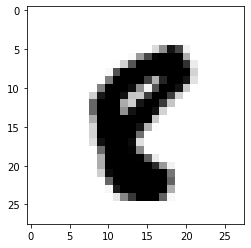

In [46]:
for i in range(0,100,1):
    print("---------------------------")
    print("Pridicted_value",pred[i])
    print("---------------------------")
    plt.imshow(XT[i].reshape(28,28),cmap=plt.cm.binary)
    plt.show()

In [49]:
pd.get_dummies(A.label).values

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)